## COMPILAÇÃO JULGADOS

### Importar pacotes e dados

In [3]:
import os
os.chdir("/Users/fernandovieira/OneDrive/1. Educacao/Academia/Artigos Academicos/Conaci CGU/Conaci/Conaci") # mudar a localização da sua máquina
os.getcwd()
os.listdir()

['.DS_Store', 'compilacaoJulgados.ipynb', 'compilacaoJulgados2.xlsx', '.git']

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling

In [5]:
julgados = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados")

### Visão inicial do df

In [6]:
julgados

,TRIBUNAL,DELITO,TIPO,DIREITO
0,STF,Estelionato,Crime instantâneo de efeitos permanentes,Previdenciário
1,STF,Estelionato,Crime permanente,Previdenciário
2,STF,Estelionato,Crime instantâneo de efeitos permanentes,Previdenciário
3,STF,Tráfico de drogas,Crime permanente,Penal
4,STF,Tráfico de drogas,Crime permanente,Penal
...,...,...,...,...
189,STM,Insubmissão,Crime permanente,Militar
190,STM,Deserção,Crime instantâneo de efeitos permanentes,Militar
191,STM,Estelionato,Crime instantâneo de efeitos permanentes,Previdenciário
192,STM,Deserção,Crime instantâneo de efeitos permanentes,Militar


### Resumo por coluna

In [7]:
julgados.groupby(["TRIBUNAL"]).size()

TRIBUNAL
STF    84
STJ    61
STM    17
TRF    25
TSE     7
dtype: int64

In [8]:
julgados.groupby(["TRIBUNAL"]).size().sum()

194

In [9]:
julgados.groupby(["DELITO"]).size()

DELITO
Apropriação indébita                                                   2
Bigamia                                                                1
Casa de prostituição                                                   1
Causar poluição                                                        1
Constituição de milícia privada, associação criminosa ou quadrilha     4
Contrabando e descaminho                                               2
Corrupção ativa                                                        1
Corrupção eleitoral                                                    6
Corrupção passiva                                                      1
Crime contra a ordem tributária                                       29
Deserção                                                               9
Estelionato                                                           61
Estupro                                                                3
Evasão de divisas                           

In [10]:
julgados.groupby(["TIPO"]).size()

TIPO
Crime continuado                             54
Crime eventualmente permanente               17
Crime instantâneo de efeitos permanentes     18
Crime permanente                            105
dtype: int64

In [11]:
julgados.groupby(["DIREITO"]).size()

DIREITO
Agrário             2
Ambiental           8
Eleitoral           7
Empresarial         2
Militar            19
Penal              68
Previdenciário     58
Tributário         30
dtype: int64

### Tabelas agregando dados

In [12]:
julgados.groupby(["TRIBUNAL", "DIREITO"]).size() # Ramos do direito por tribunal

TRIBUNAL  DIREITO        
STF       Ambiental           3
          Empresarial         1
          Militar             7
          Penal              38
          Previdenciário     34
          Tributário          1
STJ       Agrário             2
          Ambiental           2
          Empresarial         1
          Militar             1
          Penal              17
          Previdenciário     16
          Tributário         22
STM       Militar            11
          Penal               1
          Previdenciário      5
TRF       Ambiental           3
          Penal              12
          Previdenciário      3
          Tributário          7
TSE       Eleitoral           7
dtype: int64

In [13]:
julgados.groupby(["TRIBUNAL", "DIREITO"]).size().sum()

194

In [14]:
julgados.groupby(["TRIBUNAL", "TIPO"]).size()

TRIBUNAL  TIPO                                    
STF       Crime continuado                            16
          Crime eventualmente permanente              14
          Crime instantâneo de efeitos permanentes     6
          Crime permanente                            48
STJ       Crime continuado                            12
          Crime eventualmente permanente               3
          Crime instantâneo de efeitos permanentes     8
          Crime permanente                            38
STM       Crime continuado                             6
          Crime instantâneo de efeitos permanentes     4
          Crime permanente                             7
TRF       Crime continuado                            14
          Crime permanente                            11
TSE       Crime continuado                             6
          Crime permanente                             1
dtype: int64

In [15]:
julgados.groupby(["TRIBUNAL", "TIPO"]).size().sum()

194

In [16]:
tribunalDireito = julgados.groupby(["TRIBUNAL", "DIREITO"]).size()
tribunalDireito = tribunalDireito.to_frame()
tribunalDireito

0
TRIBUNAL DIREITO            
STF      Ambiental         3
         Empresarial       1
         Militar           7
         Penal            38
         Previdenciário   34
         Tributário        1
STJ      Agrário           2
         Ambiental         2
         Empresarial       1
         Militar           1
         Penal            17
         Previdenciário   16
         Tributário       22
STM      Militar          11
         Penal             1
         Previdenciário    5
TRF      Ambiental         3
         Penal            12
         Previdenciário    3
         Tributário        7
TSE      Eleitoral         7

### Dataframes dos dados

In [17]:
dfDelitosTribunal2 = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados2")
dfDelitosTribunal2

,TIPO,TRIBUNAL,QTDE
0,Crime continuado,STF,16
1,Crime continuado,STJ,12
2,Crime continuado,STM,6
3,Crime continuado,TRF,14
4,Crime continuado,TSE,6
5,Crime eventualmente permanente,STF,14
6,Crime eventualmente permanente,STJ,3
7,Crime instantâneo de efeitos permanentes,STF,6
8,Crime instantâneo de efeitos permanentes,STJ,8
9,Crime instantâneo de efeitos permanentes,STM,4


In [18]:
dfDelitosTribunal3 = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados3")
dfDelitosTribunal3

,TIPO,QTDE
0,Crime continuado,54
1,Crime eventualmente permanente,17
2,Crime instantâneo de efeitos permanentes,18
3,Crime permanente,105


### Gráficos

#### Gráfico 1

In [19]:
%matplotlib inline

In [20]:
x = dfDelitosTribunal3.iloc[:,0]
y = dfDelitosTribunal3.iloc[:,1]

In [21]:
plt.rcdefaults() 

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


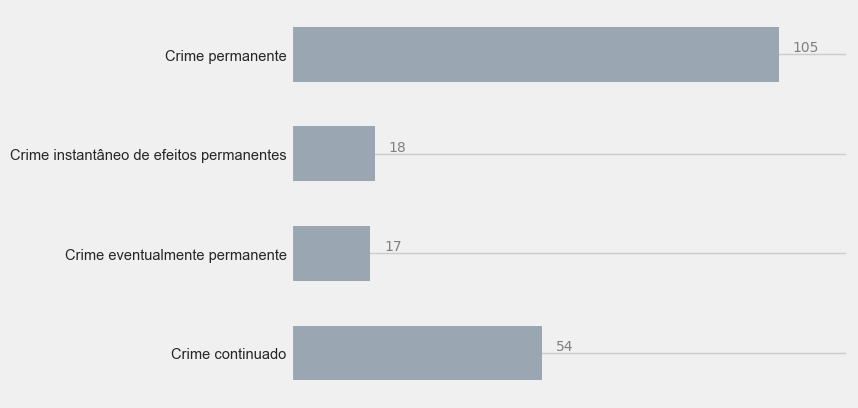

In [23]:
plt.style.use("fivethirtyeight")
plt.rc('ytick', labelsize=10.5)
hfont = {'fontname':'Arial'}

fig, ax = plt.subplots()
width = 0.55
plt.barh(x, y, width, color="#9aa6b1")
plt.yticks(**hfont, color="#272626")
plt.xlim(0, 120)
ax.set_xticks([])

for i, v in enumerate(y):
    ax.text(v + 3, i+0.03, str(v), fontsize=10, color="gray")

#### Gráfico 2

In [24]:
import squarify

In [25]:
julgadosTipo = pd.read_excel("compilacaoJulgados2.xlsx", sheet_name="dados5")
julgadosTipo

,CRIMES,QTDE,%
0,Penal - Tráfico de drogas,12,0.06
1,Penal - Crime contra a ordem tributária,29,0.15
2,Penal - Estelionato,61,0.31
3,Penal - Roubo,13,0.07
4,Penal (outros),11,0.06
5,Militares (diversos),19,0.10
6,Ambientais ou agrários (diversos),10,0.05
7,Eleitorais (diversos),7,0.04
8,Empresarial ou tributário,32,0.16


In [26]:
crimes = ["Penal - Tráfico de drogas: \n11 (6,00%)", "Penal - Crimes contra a \n ordem tributária: \n29 (15,00%)", "Penal - Estelionato: \n61 (31,00%)", 
          "Penal - Roubo: \n13 (7,00%)", "Penal (outros): \n11 (6,00%)", "Militares\n (diversos): 19\n (6,00%)", "Ambientais ou agrários \n (diversos): 10\n (5,00%)",
          "Eleitorais \n(diversos): 7\n (4,00%)", "Empresarial ou\n tributário: 32\n (16,00%)"]
qtde = [12, 29, 61, 13, 11, 19, 10, 7, 32]
cores = ["#0f7216", "#b2790c", "#ffe9a3", "#f9d4d4", "#d35158", "#6A5ACD", "#fc9803", "#eb7aba", "#fc4403"]

(0.0, 100.0, 0.0, 100.0)

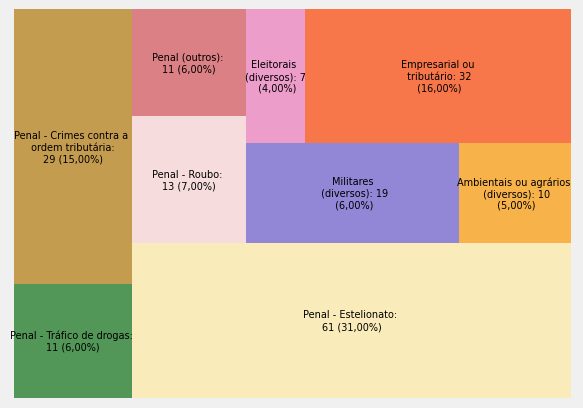

In [27]:
plt.rc("font", size=7)
squarify.plot(sizes = qtde, label = crimes, color = cores, alpha=0.7)
plt.axis("off")

#### Gráfico 3

In [28]:
from pywaffle import Waffle
from matplotlib import cm
# https://fontawesome.com/icons?d=gallery

In [33]:
crimes2 = {"Penal - Tráfico de drogas": 12, "Tributário - Crimes contra a \n ordem tributária": 29, "Penal - Estelionato": 61, 
          "Penal - Roubo": 13, "Penal (outros)": 11, "Militares\n (diversos)": 19, "Ambientais ou agrários \n (diversos)": 10,
          "Eleitorais \n(diversos)": 7, "Empresarial ou\n tributário \n(outros)": 32}

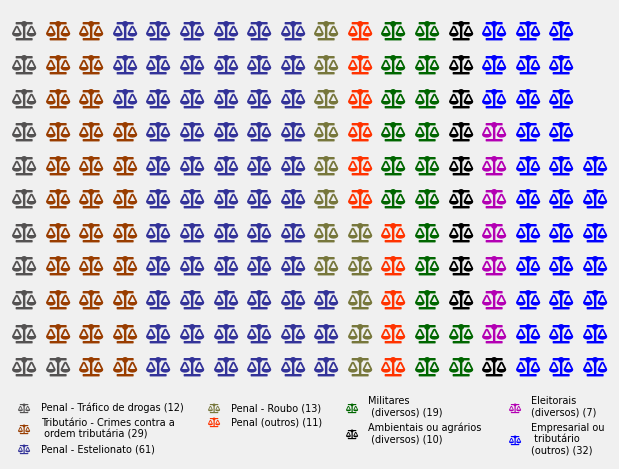

In [34]:
fig = plt.figure(
	FigureClass = Waffle, 
    rows = 11, 
    values = crimes2, 
    colors = ("#545252", "#993d00", "#333399", "#77773c", "#ff3300", "#006600", "#000000", "#b300b3", "#0000ff"),
    labels = ["{0} ({1})".format(k, v) for k, v in crimes2.items()],
    legend={"loc": "lower left", "bbox_to_anchor": (-0.01, -0.25), "ncol": 4, "framealpha": 0, "fontsize": 7},
    icons = "balance-scale", 
    icon_size = 14,
    icon_legend = True,
	)
fig.gca().set_facecolor("#EEEEEE")
fig.set_facecolor("#f0f0f0")
plt.show()

In [189]:
12+29+61+13+11+19+10+7+32

194

#### Análise utilizada no texto

In [210]:
nCrimePermanente = julgados[julgados.TIPO=="Crime permanente"]
len(nCrimePermanente)

105

In [211]:
nCrimeContinuado = julgados[julgados.TIPO=="Crime continuado"]
len(nCrimeContinuado)

54

In [215]:
len(nCrimeContinuado + nCrimePermanente)

159

In [218]:
nCrimeEvPerm = julgados[julgados.TIPO=="Crime eventualmente permanente"]
len(nCrimeEvPerm)

17

In [219]:
nCrimeNecPerm = julgados[julgados.TIPO=="Crime necessariamente permanente"]
len(nCrimeNecPerm)

0

In [220]:
len(nCrimeContinuado + nCrimePermanente + nCrimeEvPerm + nCrimeNecPerm)

176

In [221]:
176/194

0.9072164948453608